# Problem Statement:
---
###  CIFAR-10 is a dataset that consists of 60000 32 by 32 images divided into 10 classes:
#### 0. Airplanes
#### 1. Cars
#### 2. Birds
#### 3. Cats
#### 4. Deer
#### 5. Dogs
#### 6. Frogs
#### 7. Horses
#### 8. Ships
#### 9. Trucks
### The goals is to classify the data into each class using CNNs.

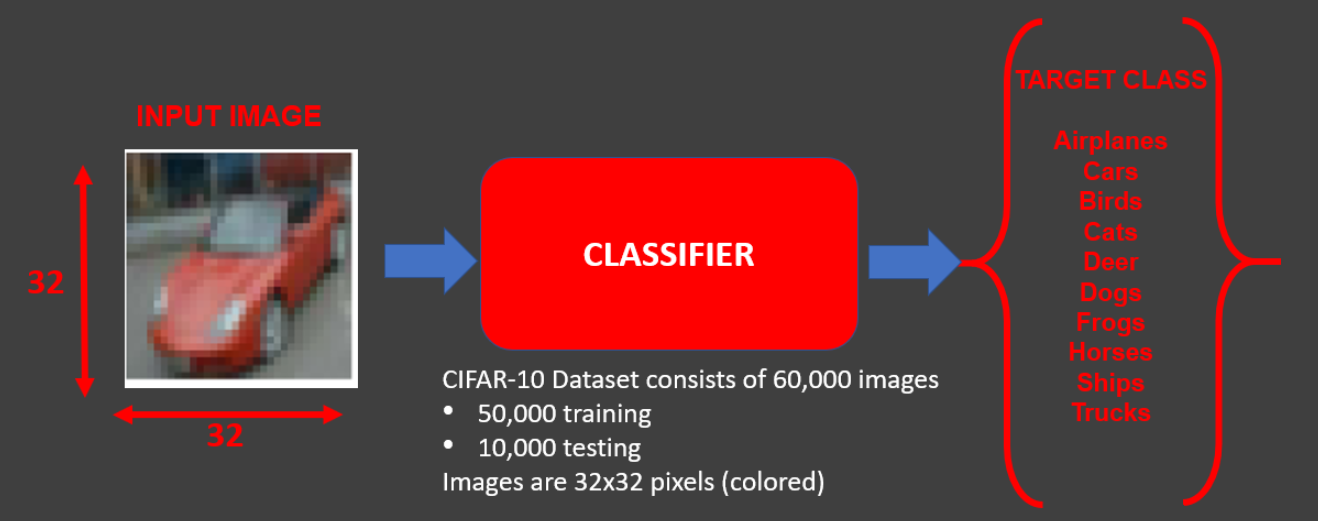

# Importing Libraries/Dataset:
---

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import datetime
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(x_train, y_train), (x_valid, y_valid) = tf.keras.datasets.cifar10.load_data()

In [3]:
# Checking the shapes of the data:
print(f'x_train shape: {x_train.shape}')
print(f'x_valid shape: {x_valid.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_valid shape: {y_valid.shape}')

x_train shape: (50000, 32, 32, 3)
x_valid shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_valid shape: (10000, 1)


# Visualizing The Data:
---

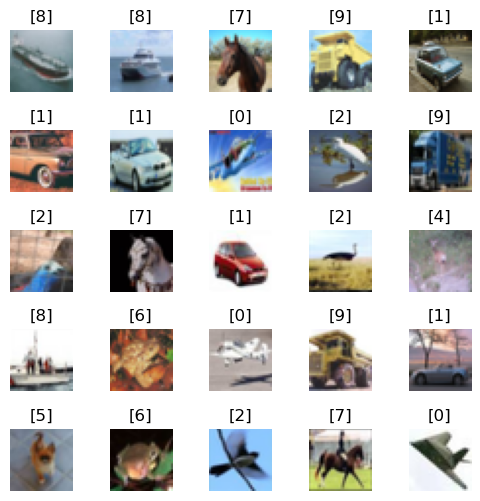

In [4]:
m = x_train.shape[0]

fig, ax = plt.subplots(5,5,figsize=(5,5))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(ax.flat):
    rand = np.random.randint(m)
    
    ax.imshow(x_train[rand].reshape(32,32,3))
    ax.set_title(y_train[rand])
    ax.set_axis_off()

# Preparing The Data For Training:
---

In [5]:
# Feature Scaling:
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255

In [6]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_valid = tf.keras.utils.to_categorical(y_valid,10)

# Building The Model:
---

In [7]:
model = tf.keras.models.Sequential([
                             tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(32,32,3)),
                             tf.keras.layers.Conv2D(32,3, activation='relu'),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Conv2D(64,3, activation='relu'),
                             tf.keras.layers.Conv2D(64,3, activation='relu'),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(1024, 'relu'),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(1024, 'relu'),
                             tf.keras.layers.Dense(10, 'softmax')
                             ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='acc')

# Training The Model:
---

In [ ]:
history = model.fit(x_train,
          y_train,
          epochs=25,
          validation_data = (x_valid, y_valid))

Epoch 1/25
1563/1563 [==============================] - 164s 104ms/step - loss: 1.5699 - acc: 0.4231 - val_loss: 1.3002 - val_acc: 0.5420
Epoch 2/25
1563/1563 [==============================] - 176s 113ms/step - loss: 1.2562 - acc: 0.5493 - val_loss: 1.1379 - val_acc: 0.5982
Epoch 3/25
1563/1563 [==============================] - 148s 95ms/step - loss: 1.1127 - acc: 0.6058 - val_loss: 0.9970 - val_acc: 0.6419
Epoch 4/25
1563/1563 [==============================] - 163s 105ms/step - loss: 1.0162 - acc: 0.6406 - val_loss: 0.9383 - val_acc: 0.6689
Epoch 5/25
1563/1563 [==============================] - 171s 109ms/step - loss: 0.9400 - acc: 0.6673 - val_loss: 0.8861 - val_acc: 0.6836
Epoch 6/25
1563/1563 [==============================] - 168s 107ms/step - loss: 0.8736 - acc: 0.6922 - val_loss: 0.8119 - val_acc: 0.7137
Epoch 7/25
1563/1563 [==============================] - 180s 115ms/step - loss: 0.8366 - acc: 0.7042 - val_loss: 0.8319 - val_acc: 0.7123
Epoch 8/25
1563/1563 [=============

# Visualizing The Performance:
---

In [ ]:
acc = history.history['acc']
valid_acc = histoacc = history.history['acc']
valid_acc = history.history['val_acc']
plt.plot(range(1,16), acc, label='Training Accuracy')
plt.plot(range(1,16), valid_acc, label='Validation Accuracy')
plt.legend()

# Evaluating How The Model Generalizes To Unseen Data:
---

In [ ]:
model.evaluate(x_valid, y_valid)

In [ ]:
prediction = model.predict(x_valid)

In [ ]:
m = x_valid.shape[0]

fig, ax = plt.subplots(5,5,figsize=(5,5))
fig.tight_layout(pad=0.5)

for i, ax in enumerate(ax.flat):
    rand = np.random.randint(m)
    
    ax.imshow(x_valid[rand].reshape(32,32,3))
    ax.set_title(f'{y_valid[rand].argmax()}, {prediction[rand].argmax()}')
    ax.set_axis_off()
fig.suptitle('True, Prediction\n\n\n\n', fontsize=13, va='center');